In [1]:
# import libraries
import pandas as pd
import random
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = pd.read_csv("sports_sci-tech.csv")
dataset.head()


,category,text
0,sports,"Phelps, Thorpe Advance in 200 Freestyle (AP) A..."
1,sports,Reds Knock Padres Out of Wild-Card Lead (AP) A...
2,sports,"Dreaming done, NBA stars awaken to harsh Olymp..."
3,sports,"Indians Beat Twins 7-1, Nearing AL Lead (AP) A..."
4,sports,"Galaxy, Crew Play to 0-0 Tie (AP) AP - Kevin H..."


In [4]:
dataset['text'][0]


"Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries."

In [5]:
dataset.shape

(200, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  200 non-null    object
 1   text      200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [7]:
dataset['category'].value_counts()


category
sports      100
sci-tech    100
Name: count, dtype: int64

In [11]:
target_category = dataset['category'].unique()
print(target_category)


['sports' 'sci-tech']


In [12]:
dataset['CategoryId'] = dataset['category'].factorize()[0]
dataset.head()

,category,text,CategoryId
0,sports,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",0
1,sports,Reds Knock Padres Out of Wild-Card Lead (AP) A...,0
2,sports,"Dreaming done, NBA stars awaken to harsh Olymp...",0
3,sports,"Indians Beat Twins 7-1, Nearing AL Lead (AP) A...",0
4,sports,"Galaxy, Crew Play to 0-0 Tie (AP) AP - Kevin H...",0


In [13]:
category = dataset[['category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,category,CategoryId
0,sports,0
100,sci-tech,1


In [8]:
%pip install wordcloud


   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB ? eta -:--:--
   --------------- ----------------------- 61.4/151.4 kB 656.4 kB/s eta 0:00:01
   ----------------------- --------------- 92.2/151.4 kB 744.7 kB/s eta 0:00:01
   ---------------------------- --------- 112.6/151.4 kB 819.2 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 655.8 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 644.7 kB/s eta 0:00:00


sports related words


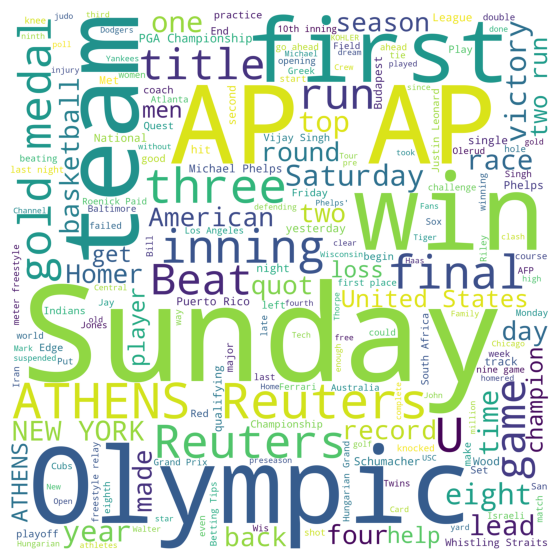

sci-tech related words


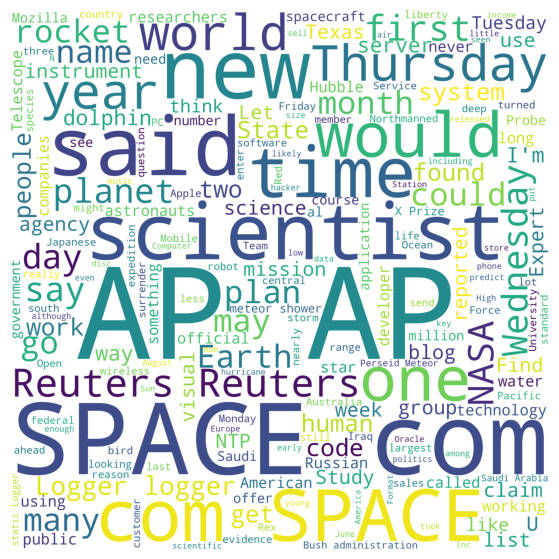

In [15]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

sports = dataset[dataset['CategoryId'] == 0]
sports = sports['text']

sci_tech = dataset[dataset['CategoryId'] == 1]
sci_tech = sci_tech['text']


def wordcloud_draw(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'news' and word != 'text')])
  wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("sports related words")
wordcloud_draw(sports, 'white')

print("sci-tech related words")
wordcloud_draw(sci_tech, 'white')


In [16]:
text = dataset["text"]
text.head(10)

0    Phelps, Thorpe Advance in 200 Freestyle (AP) A...
1    Reds Knock Padres Out of Wild-Card Lead (AP) A...
2    Dreaming done, NBA stars awaken to harsh Olymp...
3    Indians Beat Twins 7-1, Nearing AL Lead (AP) A...
4    Galaxy, Crew Play to 0-0 Tie (AP) AP - Kevin H...
5    USC Begins Season Where It Ended, at No. 1 (AP...
6    Italy's Pennetta Wins Idea Prokom Open (AP) AP...
7    Tough Race Ahead for Swimmer Phelps  ATHENS (R...
8    Iranian Will Not Meet Israeli in Olympics Due ...
9    Tiger Runs Out of Steam After Storming Start  ...
Name: text, dtype: object